# Keras - Load Single Image

케라스 패키지에는 전처리를 위한 모듈(Preprocessing)이 포함되어 있다.
학습 데이터 혹은 테스트데이터로 사용자의 이미지 파일을 이용하기 위해서는 이미지를 불러와야 하는데, 
preprocessing 모듈의 image 객체를 사용하면 된다. 이를 이용하려면 pillow 패키지도 설치되어 있어야 한다.

In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras import datasets
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing import image

import PIL
import numpy as np
import matplotlib.pyplot as plt

import os



cifar_mnist = datasets.cifar10
 
(train_images, train_labels), (test_images, test_labels) = cifar_mnist.load_data()



In [ ]:
img_data = image.load_img('imaterialist-fashion-2020-fgvc7/train/0000fe7c9191fba733c8a69cfaf962b7.jpg', target_size=(500,500))

target_size는 이미지를 불러오는 크기를 지정한다.
아래와 같이 plt를 이용하여 불러온 이미지 데이터를 확인할 수 있다.

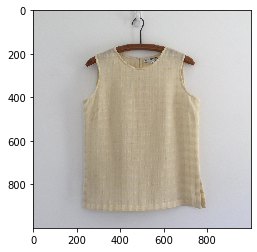

In [14]:
plt.imshow(img_data)
plt.show()

### Keras - Load Multiple Image
데이터 세트를 불러올 때는 한 번에 대량의 데이터를 불러올 필요가 있다.
그럴 때 위에서 살펴본 방법을 톨해 이미지를 하나씩 불러오는 것은 좋은 방법이 아니다.
이럴 때는 ImageDataGenerator를 이용한다.
이미지 데이터의 픽셀 값은 0~255 범위의 값을 가지므로 딥러닝 연산에 용이하도록 0~1 범위로 정규화하며 불러오도록 설정한다.

In [21]:
from keras.preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator(rescale=1./255)

In [26]:
train_generator = data_generator.flow_from_directory(
    'img',
    target_size = (500, 500),
    batch_size =1,
    class_mode='categorical'
)

Found 289219 images belonging to 5620 classes.


In [28]:
x_train, y_train = train_generator.next()

(500, 500, 3)


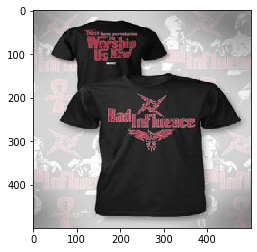

In [29]:
print(x_train[0].shape)
plt.imshow(x_train[0])
plt.show()